In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist

import numpy as np

1. Build and train a keras sequential model to classify digits form the mnist dataset. The model
must have a hidden dense layer of 128 neurons with a relu activation function.

In [40]:

# Split dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to range [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

n_classes = len(np.unique(y_train))
print("Classes:",n_classes)


# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')


Classes: 10
60000 train sequences
10000 test sequences


In [41]:
model = Sequential([
    Flatten(input_shape=(x_train.shape[1], x_train.shape[2])),
    Dense(128, activation='relu'),
    Dense(n_classes, activation='softmax') # output layer
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [42]:
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])


In [43]:
batch_size = 128
epochs = 100
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5172 - loss: 1.6849 - val_accuracy: 0.8798 - val_loss: 0.6327
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8516 - loss: 0.6421 - val_accuracy: 0.9023 - val_loss: 0.4214
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.8781 - loss: 0.4768 - val_accuracy: 0.9123 - val_loss: 0.3531
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8905 - loss: 0.4173 - val_accuracy: 0.9190 - val_loss: 0.3189
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8952 - loss: 0.3831 - val_accuracy: 0.9198 - val_loss: 0.2969
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9010 - loss: 0.3574 - val_accuracy: 0.9218 - val_loss: 0.2816
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9047 - loss: 0.3423 - val_accuracy: 0.9253 - val_loss: 0.2696
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9095 - loss: 0.3277 - val_acc

In [44]:
score = model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9612 - loss: 0.1258
Test score: 0.1099856048822403
Test accuracy: 0.9671000242233276


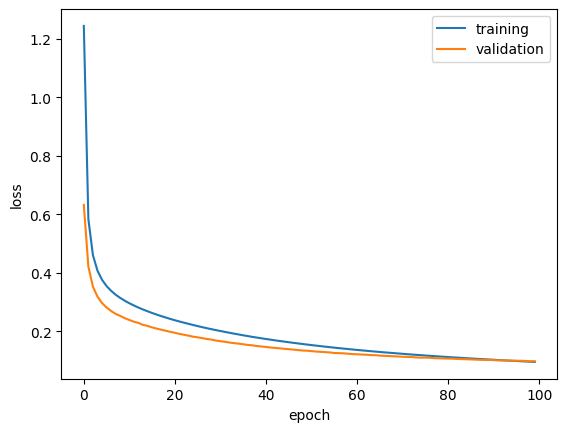

In [45]:
import pylab as pl

pl.plot(np.arange(epochs), history.history['loss'], label='training')
pl.plot(np.arange(epochs), history.history['val_loss'], label='validation')
pl.xlabel('epoch')
pl.ylabel('loss')
pl.legend();

2. Now build and train a keras functional model for the same problem. The model must have
a hidden dense layer of 128 neurons with an activation function defined by the following
function:

$$
Activation(x) =
\begin{cases}
0 & \text{if } x < 0 \\
\sin\left(x - \frac{\pi}{2}\right) + 1 & \text{if } 0 \le x \le \frac{\pi}{2} \\
x - \frac{\pi}{2} + 1 & \text{otherwise}
\end{cases}
$$

In [46]:
@tf.function
def custom_activation(x):

    cond1 = tf.math.less(x, 0)
    cond2 = tf.math.less_equal(x, np.pi/2)

    value1 = tf.constant(0, dtype=tf.float32)
    value2 = tf.math.sin(x - np.pi/2) + 1
    value3 = x - np.pi/2 + 1

    return tf.where(cond1, value1, tf.where(cond2, value2, value3))

    if tf.math.less(x, 0):
        return tf.constant(0, dtype=tf.float32)
    elif tf.math.less_equal(x, np.pi/2):
    # elif 0 <= x <= np.pi/2:
        return tf.math.sin(x - np.pi/2) + 1
    else:
        return tf.constant(x - np.pi/2 + 1, dtype=tf.float32)

In [47]:
custom_model = Sequential([
    Flatten(input_shape=(x_train.shape[1], x_train.shape[2])),
    Dense(128, activation=custom_activation), # Uses custom activation function
    Dense(n_classes, activation='softmax') # output layer
])

In [48]:
custom_model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])


In [49]:
batch_size = 128
epochs = 100
custom_history = custom_model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3639 - loss: 2.0507 - val_accuracy: 0.8073 - val_loss: 1.0108
Epoch 2/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7972 - loss: 0.9096 - val_accuracy: 0.8807 - val_loss: 0.5453
Epoch 3/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8535 - loss: 0.5833 - val_accuracy: 0.8973 - val_loss: 0.4203
Epoch 4/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8738 - loss: 0.4846 - val_accuracy: 0.9068 - val_loss: 0.3652
Epoch 5/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8826 - loss: 0.4325 - val_accuracy: 0.9123 - val_loss: 0.3329
Epoch 6/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8913 - loss: 0.3985 - val_accuracy: 0.9162 - val_loss: 0.3128
Epoch 7/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8932 - loss: 0.3764 - val_accuracy: 0.9188 - val_loss: 0.2975
Epoch 8/100
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8962 - loss: 0.3643 - val_accu

In [50]:
score = custom_model.evaluate(x_test, y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9591 - loss: 0.1396
Test score: 0.12094179540872574
Test accuracy: 0.965399980545044


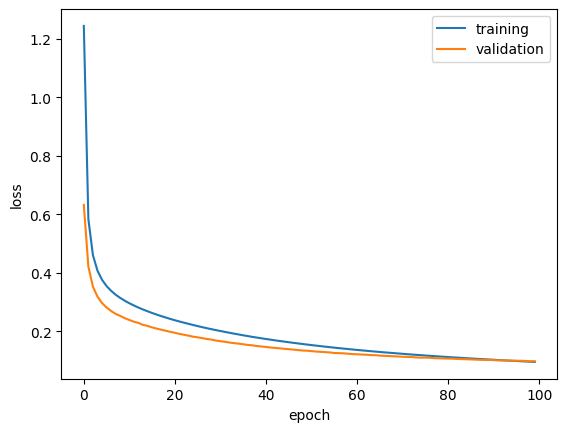

In [51]:
pl.plot(np.arange(epochs), history.history['loss'], label='training')
pl.plot(np.arange(epochs), history.history['val_loss'], label='validation')
pl.xlabel('epoch')
pl.ylabel('loss')
pl.legend();

# 3. Repeat the previous questions but now using *pythorch*

In [52]:
import numpy as np

In [53]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision.datasets import mnist
from torchvision.transforms import ToTensor


In [54]:
mnist_train = mnist.MNIST(root='data', train=True, download=True, transform=ToTensor())
mnist_test = mnist.MNIST(root='data', train=False, download=True, transform=ToTensor())

# Normalize the pixel values ranges [0, 1]
mnist_train.data = mnist_train.data / 255.0
mnist_test.data = mnist_test.data / 255.0

n_classes = len(np.unique(mnist_train.targets))
print("Classes:",n_classes)

print(len(mnist_train), 'train sequences')
print(len(mnist_test), 'test sequences')

# Prepare data for PyTorch
# Convert tensors to appropriate dtype (float for data, long for labels)
x_train_tensor = mnist_train.data.unsqueeze(1) # Add channel dimension
y_train_tensor = mnist_train.targets.long()
x_test_tensor = mnist_test.data.unsqueeze(1) # Add channel dimension
y_test_tensor = mnist_test.targets.long()

# Create DataLoader for training and testing
train_dataset = TensorDataset(x_train_tensor, y_train_tensor)
test_dataset = TensorDataset(x_test_tensor, y_test_tensor)

batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Classes: 10
60000 train sequences
10000 test sequences


In [55]:
# Define the custom activation function using PyTorch
def custom_activation_pytorch(x):
    condition1 = torch.less(x, torch.tensor(0.0))
    condition2 = torch.less_equal(x, torch.tensor(np.pi/2.0))

    value1 = torch.zeros_like(x)
    value2 = torch.sin(x - np.pi/2.0) + 1.0
    value3 = x - np.pi/2.0 + 1.0

    return torch.where(condition1, value1, torch.where(condition2, value2, value3))

# Create the PyTorch model
class CustomNet(nn.Module):
    def __init__(self):
        super(CustomNet, self).__init__()
        self.flatten = nn.Flatten()
        self.dense1 = nn.Linear(28*28, 128) # MNIST image size is 28x28
        self.custom_act = custom_activation_pytorch
        self.dense2 = nn.Linear(128, n_classes) # n_classes is 10 for MNIST

    def forward(self, x):
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.custom_act(x)
        x = self.dense2(x)
        return x

In [56]:
model = CustomNet()
print(model)

CustomNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (dense1): Linear(in_features=784, out_features=128, bias=True)
  (dense2): Linear(in_features=128, out_features=10, bias=True)
)


In [57]:
import time

def train(dataloader):
    # print("Training...")
    model.train()
    # print("Model trained")
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    # print("Starting loop")
    for idx, (input, label) in enumerate(dataloader):
        # print("label:", label)
        # print("offset:", offsets)

        optimizer.zero_grad()
        # print("zero_grad")
        predicted_label = model(input)
        # print(predicted_label)
        # print("label.shape", label.shape)
        # print("predicted_label.shape", predicted_label.shape)
        loss = criterion(predicted_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 0.1)
        optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| epoch {:3d} | {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(epoch, idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader):
    model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (input, label) in enumerate(dataloader):
            predicted_label = model(input)
            loss = criterion(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [58]:
# Hyperparameters
EPOCHS = 20 # epoch
LR = 1e-3  # learning rate

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1.0, gamma=0.1)
total_accu = None


for epoch in range(1, EPOCHS + 1):
    epoch_start_time = time.time()
    train(train_loader)
    accu_val = evaluate(test_loader)
    if total_accu is not None and total_accu > accu_val:
      scheduler.step()
    else:
       total_accu = accu_val
    print('-' * 59)
    print('| end of epoch {:3d} | time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(epoch,
                                           time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

-----------------------------------------------------------
| end of epoch   1 | time:  3.40s | valid accuracy    0.931 
-----------------------------------------------------------
-----------------------------------------------------------
| end of epoch   2 | time:  2.93s | valid accuracy    0.953 
-----------------------------------------------------------
-----------------------------------------------------------
| end of epoch   3 | time:  3.76s | valid accuracy    0.960 
-----------------------------------------------------------
-----------------------------------------------------------
| end of epoch   4 | time:  3.80s | valid accuracy    0.964 
-----------------------------------------------------------
-----------------------------------------------------------
| end of epoch   5 | time:  4.20s | valid accuracy    0.971 
-----------------------------------------------------------
-----------------------------------------------------------
| end of epoch   6 | time:  2.82s |

In [59]:
print('Checking the results of test dataset.')
accu_test = evaluate(test_loader)
print('test accuracy {:8.3f}'.format(accu_test))

Checking the results of test dataset.
test accuracy    0.978
